<h1 align="center">Multiple Linear Regression</h1>

<img src='https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_04_linear-Regression-1.jpg'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split 
from scipy import stats

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  #p2(başarı oranını gösterir)

from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')  

# <font color=purple>E.D.A</font>

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

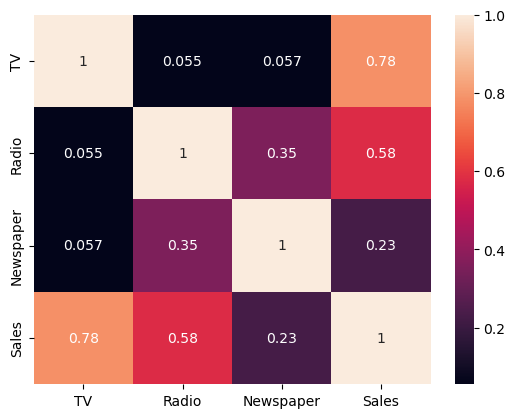

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* TV ve Sales arasında güçlü bir pozitif ilişki vardır.
* Radio ve Sales arasında orta düzeyde bir pozitif ilişki vardır.
* Newspaper ve Sales arasında zayıf bir pozitif ilişki vardır.
* TV, Radio ve Newspaper harcamaları arasında ise neredeyse hiç ilişki yoktur.

# P-Value

In [11]:
stats.ttest_ind(df['TV'],df['Sales'])
# p-value <0.05 ten H0 reddedip alternatifini kabul ediyoruz.

TtestResult(statistic=21.87105520413898, pvalue=3.287531216460733e-70, df=398.0)

In [12]:
stats.ttest_ind(df['Radio'],df['Sales'])
# aynı şekilde

TtestResult(statistic=8.304981206205216, pvalue=1.580156222732028e-15, df=398.0)

In [13]:
stats.ttest_ind(df['Newspaper'],df['Sales'])
# aynı şekilde

TtestResult(statistic=10.439476566798964, pvalue=1.0345848819761895e-22, df=398.0)

<Axes: xlabel='Sales', ylabel='Count'>

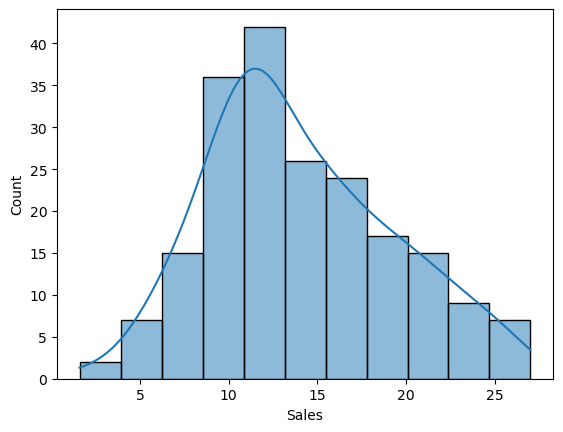

In [14]:
sns.histplot(x=df['Sales'],kde=True)
# sales sutununun distrubutionuna bakalım, iyi görünüyor

In [15]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

## <font color=PURPLE>MODELING</font>

In [16]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [17]:
#x=pd.get_dummies(x,drop_first=True)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
print(x_test)

        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [21]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [22]:
lr=LinearRegression()

In [23]:
model=lr.fit(x_train, y_train)

In [24]:
tahmin=model.predict(x_test)

In [29]:
# x ve y değerlerini ayır
tahmin_x = np.arange(len(tahmin))
tahmin_y = tahmin
# Yazdır
print("x değerleri:")
print(tahmin_x)
print("\ny değerleri:")
print(tahmin_y)

x değerleri:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

y değerleri:
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [30]:
mean_squared_error(y_test,tahmin)
#gerçek değerle tahmin edilen değeri karşılaştır aradaki farkı bul, düşük mse gerçek değere daha yakındır

3.1740973539761046

In [31]:
r2_score(tahmin,y_test)

0.8791069137120033

In [39]:
# Test olarak ayırdığımız veri ile tahmin ettiğimiz veriyi aynı grafikte line chart ile görselleştirelim.
#grafik 
#yukarıda x ve y verilerini yazdırdım, grafikle gösterdim, neden karışık çıktı anlamadım.

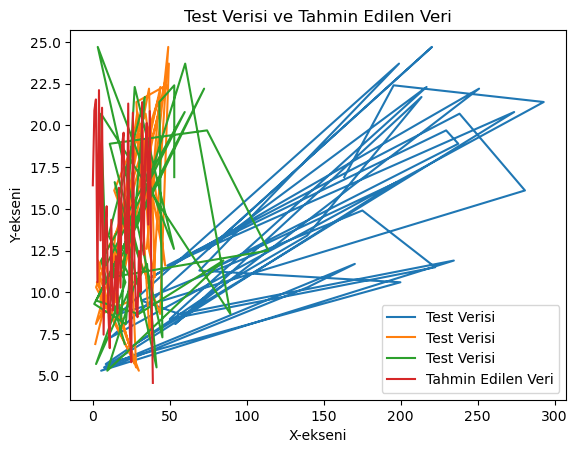

In [38]:
# Line chart oluşturma
plt.plot(x_test, y_test, label='Test Verisi')
plt.plot(tahmin_x, tahmin_y, label='Tahmin Edilen Veri')

# Eksen etiketleri ve başlık ekleme
plt.xlabel('X-ekseni')
plt.ylabel('Y-ekseni')
plt.title('Test Verisi ve Tahmin Edilen Veri')
plt.legend()
plt.show()                                                 #Kod Poe'den

* modelimiz %87 r-2 ile iyi bir başarı sergiledi, modelimiz % 87 doğru tahminde bulundu demek.